# Handling Missing Values

1. Delete the records which has missing values
2. Create a separate model to handle missing values
3. Imputing values using some statistical methods

# Example use case explained using Logistic Regression with Python

1. A semi cleaned dataset 'Titanic' Data Set from Kaggle is being used. 
2. This is a very famous data set and very often is a student's first step in machine learning.
3. This is a classification problem - class survival or deceased.

# Import Libraries

Import required libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the Data Set

In [49]:
train = pd.read_csv('/Users/priyashaprasad/Documents/Codecademy - ML/titanic_train.csv')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three attributes/features which have missing/Nan values - Age, Cabin, Embarked

# Exploratory Data Analysis

In [52]:
train.shape

(891, 12)

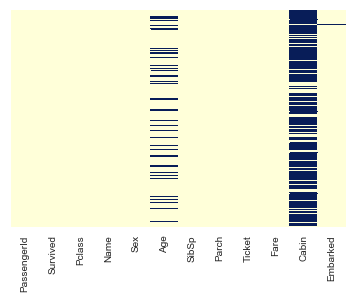

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [54]:
(177.0/891.0)*100

19.865319865319865

Close to 20% of the Age feature is missing

In [55]:
(687.0/891.0) * 100

77.10437710437711

Close to 77% of the Cabin feature is missing

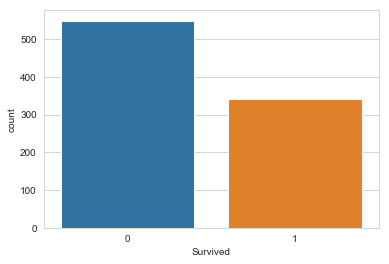

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

Survival: 0 = No, 1 = Yes
We see that there are more number of people who have not survived than the people who have survived.

Now, we explore more on survival feature to understand more about the attributes of people who have survived
1. Sex

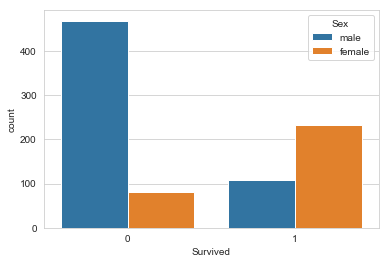

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

2. Passenger Class 


pclass means Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd

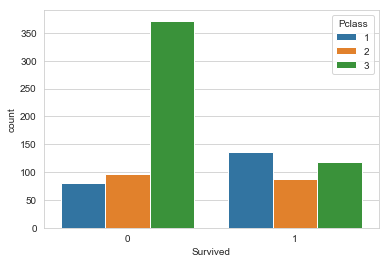

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

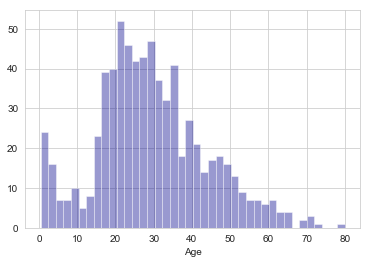

In [59]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkblue',bins=40)

# Data Cleaning

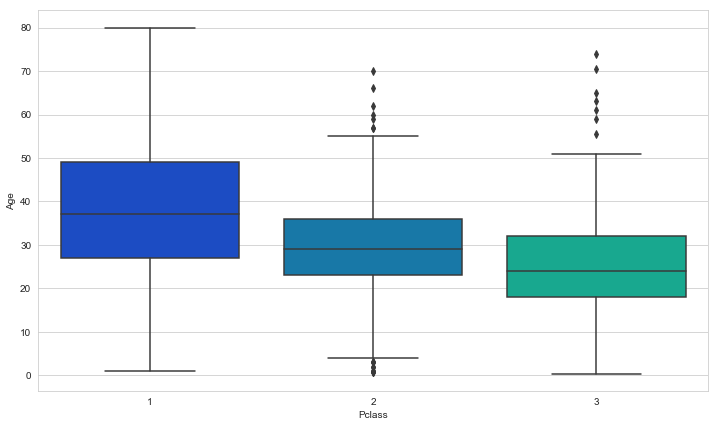

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

1. For pclass 1: The median age is around 37
2. For pclass 2: The median age is around 29
3. For pclass 3: The median age is around 


So we are going to be using this logic to impute the missing age values

In [63]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [64]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now, we have successfully imputed the missing values for age


In [65]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For this example we are going to be dropping the cabin column that has almost 77% missing values and the twi records whose vales are missing in the Embarked column

In [67]:
train.drop('Cabin',axis=1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now the Cabin column is dropped

In [69]:
train.dropna(inplace=True)

In [70]:
train.shape

(889, 11)

We have dropped the two records which had NaN in embarked, so now the no of records has dropped from 891 to 889

# Converting Categorical Features

Encoding of categorical features

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [73]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

we have three categories in Embarked and we will be have (3-1) = 2 columns when creating dummy variables

In [77]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

We are dropping the below columns the Name, Ticket (Ticket Number) are not going to add value to our analysis 
and we are dropping the Sex and Embarked column to add the newly created variables to the same.

In [78]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [79]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [80]:
train = pd.concat([train,sex,embark],axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building the Logistic Regression model

1. Train Test Split

In [84]:
X = train.drop('Survived',axis=1)

In [85]:
y = train['Survived']

In [86]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [87]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)
                                                         
                                                   

2. Training

In [90]:
from sklearn.linear_model import LogisticRegression


In [93]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

3. Prediction

In [98]:
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix


In [100]:
accuracy=confusion_matrix(y_test,y_pred)

In [101]:
accuracy

array([[151,  12],
       [ 36,  68]])

In [102]:
from sklearn.metrics import accuracy_score

In [104]:
acc_score = accuracy_score(y_test,y_pred)


In [105]:
acc_score

0.8202247191011236

4. Evaulation

from sklearn.metrics import classification_report


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

